# [에어크루] 항공사 고객 만족도 예측 경진대회 
# Stage 3. EDA

항공사 고객 만족도 예측 경진대회에 참여하신 데이커 여러분, 환영합니다. 🙌

이번 시간에는 데이터 분석에 필요한 EDA를 진행해보겠습니다. 개인적으로 데이터 분석의 꽃이라고 생각하는 부분인데요! EDA를 통해 데이터 속 숨겨진 인사이트를 얻을 수 있기 때문입니다.

---

## 3. EDA
### 3.1 전체 데이터 train 중, ‘target’ 비율 확인하기

우리가 확인해야하는 ‘target’ 열은 0과 1로 구분되어있습니다.  0은 [불만족], 1은 [만족]을 표현합니다.

In [2]:
target_0 = train[train['target'] == 0]['target'].count()
target_1 = train[train['target'] == 1]['target'].count()
target = train['target'].count()

* target 0과 1의 구성개수 확인  

In [3]:
target_0_per = target_0 / target * 100
target_1_per= target_1 / target * 100

target 수의 비율 확인 후, 간단한 barh형식으로 시각화해보려고 합니다.
stage2 에서 불러온 패키지를 활용해서 가로막대 그래프로 시각화 해볼게요!

In [5]:
# target 비율 확인
percent = {'target_0':[target_0_per], 'target_1':[target_1_per]}
target_per = pd.DataFrame(percent)
target_per

,target_0,target_1
0,44.4,55.6


<BarContainer object of 1 artists>

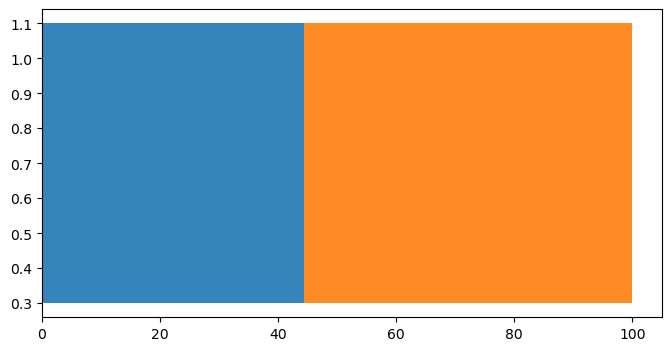

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8, 4))

ax.barh(0.7, target_per['target_0'], alpha = 0.9, label = 'target_0')
ax.barh(0.7, target_per['target_1'], alpha = 0.9, left = target_per['target_0'], label = 'target_1')

### 3.2 비행만족도에 가장 영향을 미치는 변수 알아보기

먼저, stage 2에서 라벨 인코딩했던 ‘qual_col’ 변수들의 target 비교하기!

- 이번에도 matplotlib 패키지 내의 막대그래프로 시각화!

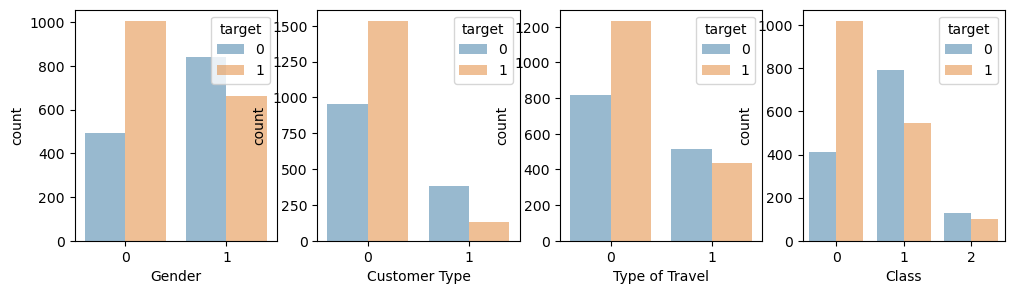

In [11]:
plt.figure(figsize=(12, 3))
for i, col in enumerate(qual_col):
    plt.subplot(1, 4, i + 1)
    sns.countplot(x=col, hue='target', data=train, alpha=0.5)

전체 column 중, qual_col을 제외한 columns들을 특성별로 그룹화해서 시각화하기

- 질적 변수 : qual_col
- 범주형 (순위 변수) : order_col
- 연속형 변수 : cnt_col

In [12]:
qual_col = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
order_col = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink','Gate location', 
         'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
         'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
         'Cleanliness', 'Online boarding']
cnt_col = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

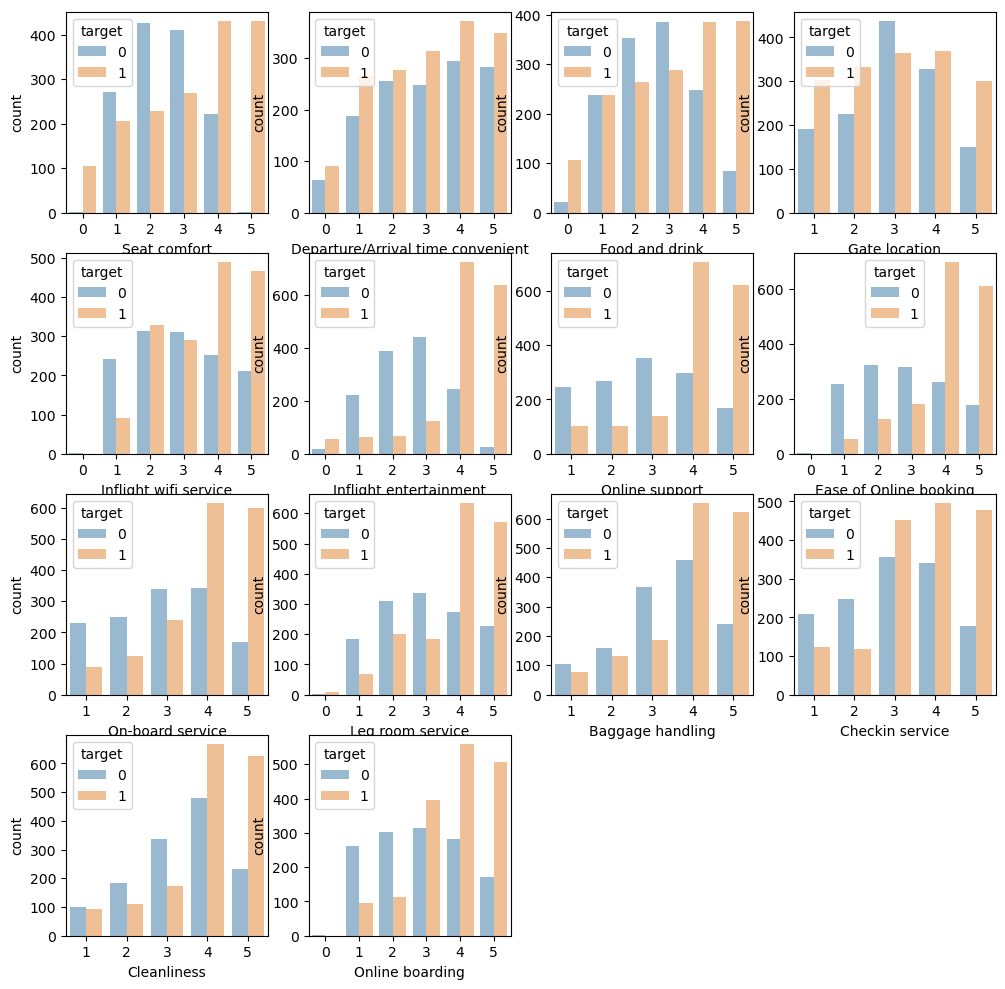

In [13]:
plt.figure(figsize = (12, 12))
for i, col in enumerate(order_col):
  plt.subplot(4,4, i + 1)
  sns.countplot(x = col, hue = 'target', data = train, alpha = 0.5)

### 3.3 전체 변수 상관관계 확인하기

가장 기본적인 상관관계를 확인할 수 있는 간편한 히트맵도 그려볼게요.

<AxesSubplot:>

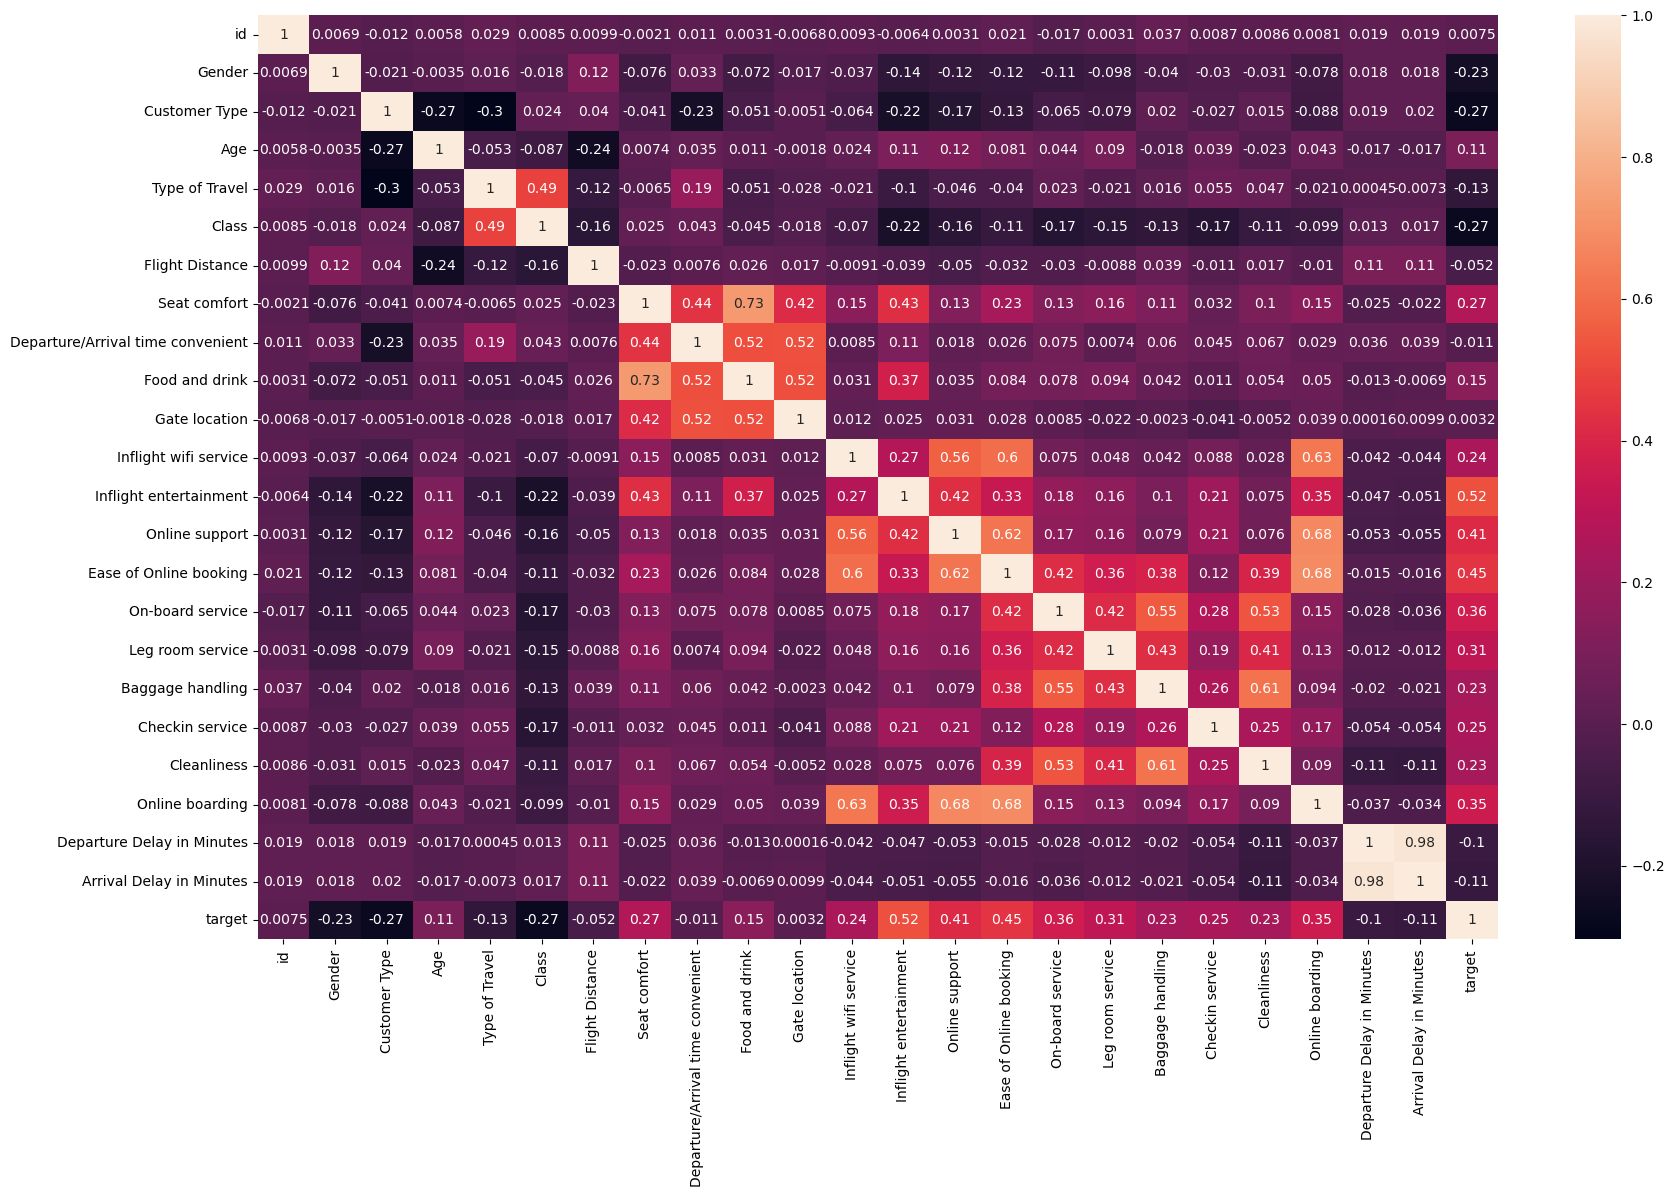

In [14]:
plt.figure(figsize=(20, 12))
sns.heatmap(train.corr(), annot=True)

→ 출발/도착 지연시간의 연관성은 매우 높으며, Online 관련 특성들도 연관성이 높음을 확인할 수 있어요.

→ Seat Comfort와 Food and Drink도 연관성이 보입니다.

### 3.4 target과 타 변수 상관관계 확인하기

<AxesSubplot:ylabel='target'>

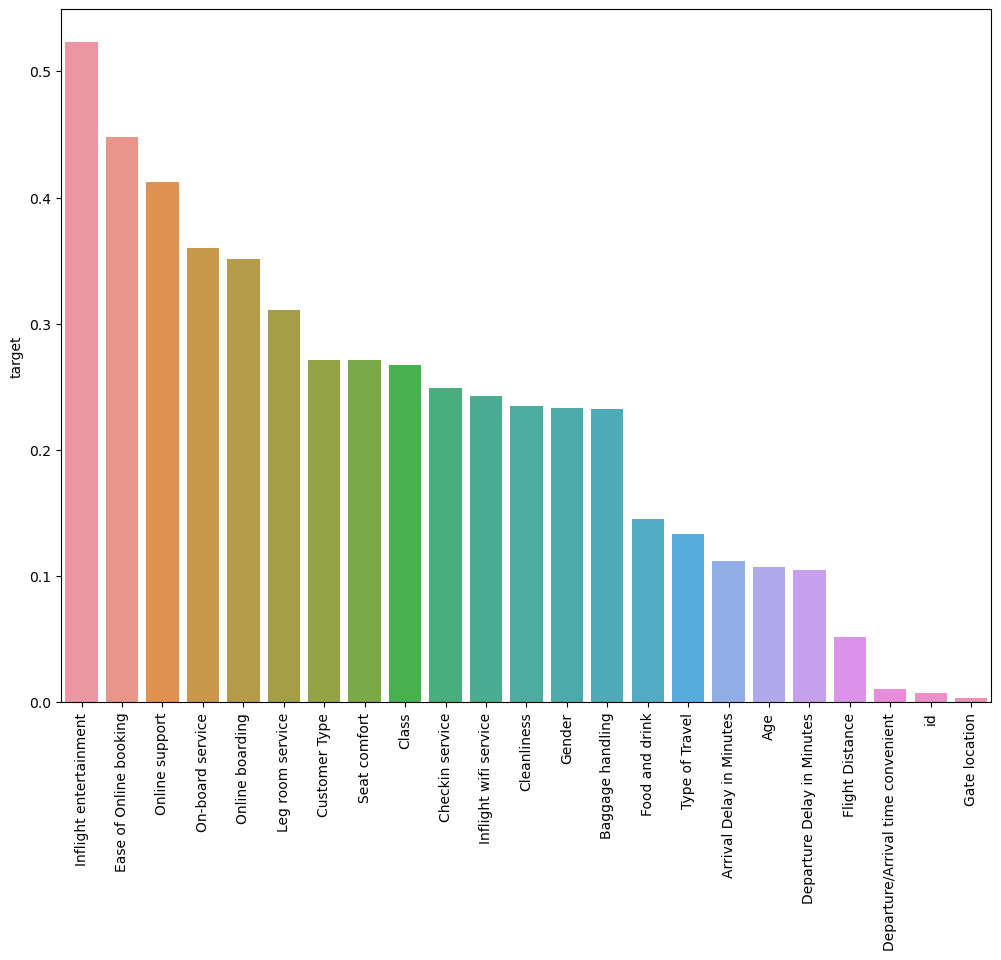

In [15]:
plt.figure(figsize=(12,9)) 
plt.xticks(rotation = 90)
sns.barplot(x = abs(train.corr()["target"]).sort_values(ascending = False)[1:].index ,
            y = abs(train.corr()["target"]).sort_values(ascending = False)[1:]) # target제외

→ 위에서 확인한 변수 간의 중요도를 확인할 수 있어요!

간단히 살펴본 EDA 과정입니다. 변수 하나씩 세부적으로 분석한다면 다음 stage를 진행하면서나 모델 학습 시, 더욱 정확도를 높일 수 있을 거예요. 

EDA 과정을 통해서 변수를 선택하거나, 제거할 판단요소를 찾을 수 있습니다. 

데이커 여러분의 새로운 아이디어를 기대합니다!🙌

---

stage 3, 무사히 완료 =33

다음 stage에서 만나요!